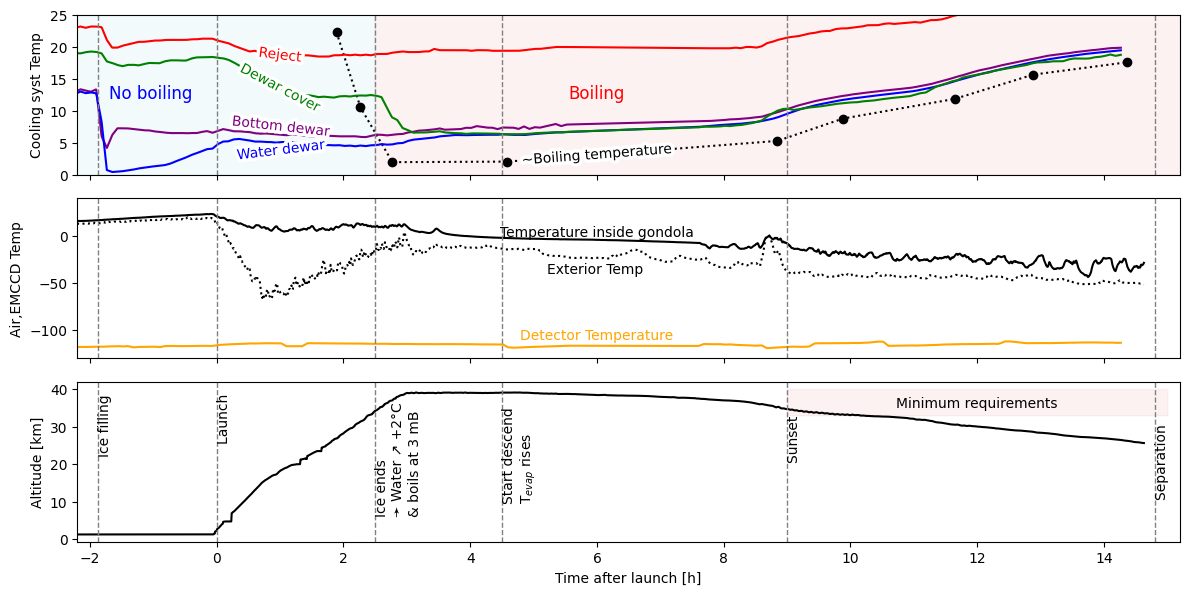

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from labellines import labelLine, labelLines

# Load data from the CSV file
file_path = "/Users/Vincent/Nextcloud/LAM_new_account/FIREBALL/LAM-Transfer/Thermal/FlightPrincipalCatalog_Final_V4_11122018.csv"
data = Table.read(file_path, format="csv")

# Extract columns9
time = (data['SECONDS_TU']-np.min(data['SECONDS_TU'])) /3600 -6-7.5-2.9

water_temp_bot = data['Water-Temp-bot[C]']
water_temp_top = data['Water-Temp-top[C]TBC']
reject_temp = data['Reject[C]']
dewar_cover = data['Water-Temp-bot-pt100[C]']
emccd_back = data['EMCCDBack[C]']

time_points = [-1.88, 0, 2.5, 4.5,9,14.8]  # in hours
labels = ["Ice filling ", "Launch ", "Ice ends \n➛ Water ↗ +2°C   \n& boils at 3 mB ", "Start descend    \n"+r"T$_{evap}$ rises ","Sunset      ","Separation        "]


# Exemple d'utilisation
altitude = data['BRD_GPS_126_TM_OPER_ALTITUDE']  # Altitude en mètres
# temperature_eau_bouillante = temperature_ebullition(altitude)
# Create subplots


# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(12, 6))

# First subplot
ax1.plot(np.array([1.8907563025210083, 2.2689075630252105, 2.7731092436974794, 4.5882352941176485, 8.84873949579832,   9.882352941176473,  11.647058823529415, 12.882352941176473, 14.369747899159668]),
[22.320887636491722,  10.548105469732803,  1.9927791475871786,  2.079831932773107,  5.317264630403063,   8.805791777788961,  11.88610174608766,  15.677049262818901,  17.615483319076137],"o:k", label='~Boiling temperature')

ax1.plot(time, reject_temp, label='Reject', color='red')
ax1.plot(time, dewar_cover, label='Bottom dewar\n', color='purple')

ax1.plot(time, water_temp_bot, label='\nWater dewar', color='blue')
ax1.plot(time, water_temp_top, label='Dewar cover', color='green')
# ax1.plot(time, boiling_temp, label='Boiling Temp (based on Altitude)', color='orange', linestyle='--')
ax1.set_ylim((0,25))
ax1.set_ylabel("Cooling syst Temp")
# ax1.legend(loc="upper right")
# labelLines(ax1.get_lines(), align=False, xvals=[6,-1,-1,-1,-1])#, zorder=2.5)
labelLines(ax1.get_lines(), align=True, xvals=[6,1,1,1,1])#, zorder=2.5)

ax1.fill_between(time, ax1.get_ylim()[0], ax1.get_ylim()[1], where=(time <= 2.5), color='skyblue', alpha=0.1, label="No Boiling")
ax1.fill_between(time, ax1.get_ylim()[0], ax1.get_ylim()[1], where=(time > 2.5), color='lightcoral', alpha=0.1, label="Boiling")



ax3.fill_between(time, 33, 40, where=(time >9)  &( time<9+6), color='lightcoral', alpha=0.1, label="Minimum requirements")
ax3.text(12, 35, r"Minimum requirements", fontsize=10, color='k', ha='center')#, fontweight='bold')


# Add labels for the "No Boiling" and "Boiling" regions
# ax1.text(1, 25, r"0<T$_{evap}$"+"<22°C ➛ No boiling ", fontsize=12, color='blue', ha='center', fontweight='bold')
ax1.text(-1, 12, r"No boiling ", fontsize=12, color='blue', ha='center')#, fontweight='bold')
ax1.text(6, 12, "Boiling", fontsize=12, color='red', ha='center')#, fontweight='bold')



ax2.text(6, -40, r"Exterior Temp ", fontsize=10, color='k', ha='center')#, fontweight='bold')
ax2.text(6, 0, "Temperature inside gondola", fontsize=10, color='k', ha='center')#, fontweight='bold')
ax2.text(6, -110, "Detector Temperature", fontsize=10, color='orange', ha='center')#, fontweight='bold')

# ax1.grid()

# Second subplot
ax2.plot(time, emccd_back, color='orange')
# ax2.set_xlabel("Time after launch [h]")
ax2.set_ylabel("Air,EMCCD Temp")




ax2.plot(time[data["Temp Air Ext"]>-100], data["Temp Air Ext"][data["Temp Air Ext"]>-100],"k:", label='Exterior Temp')
ax2.plot(time[data["Temp Air Ext"]>-100], data["Temp Air Int"][data["Temp Air Ext"]>-100],"k-", label='Temperature inside gondola')
# labelLines(ax3.get_lines(), align=True, xvals=[6,6])#, zorder=2.5)

ax3.set_xlabel("Time after launch [h]")
ax3.set_ylabel("Altitude [km]")

# ax2.legend(loc="upper right")
# ax2.grid()
ax2.set_ylim((-130,40))

ax3.plot(list(time[~data["BRD_GPS_126_TM_OPER_ALTITUDE"].mask]), list(data["BRD_GPS_126_TM_OPER_ALTITUDE"][~data["BRD_GPS_126_TM_OPER_ALTITUDE"].mask]/1000) ,"k-", label='Temperature inside gondola')

# ax3.set_ylim((-81,41))

for t, label in zip(time_points, labels):
    ax1.axvline(x=t, color='gray', linestyle='--', linewidth=1)  # Vertical line
    ax2.axvline(x=t, color='gray', linestyle='--', linewidth=1)  # Vertical line
    ax3.axvline(x=t, color='gray', linestyle='--', linewidth=1)  # Vertical line
    ax3.text(t, ax2.get_ylim()[1], label, rotation=90, verticalalignment='top',
             horizontalalignment='left', fontsize=10)#, color='blue', fontweight='bold')

# plt.tight_layout()
# Show plot
ax2.set_xlim((-2.2,15.2))
plt.tight_layout()
plt.show()






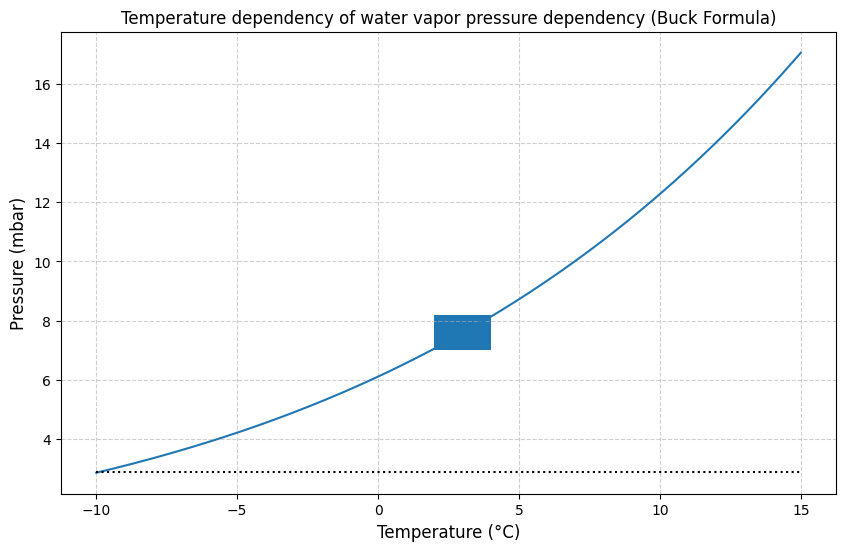

In [24]:
# Correcting the formula and plotting again

# Define ranges for temperature (T) and pressure (y)
T_range = np.linspace(-10, 15, 300)  # Temperature range from 0 to 15°C
P =10* 0.61121 * np.exp((18.678 - T_range / 234.5) * (T_range/(257.14 + T_range)))  # Using corrected exponential

# Plotting
a,b = T_range.min(), T_range.max()
plt.figure(figsize=(10, 6))
plt.plot(T_range,P, label="P (mbar)")
plt.title("Temperature dependency of water vapor pressure dependency (Buck Formula)")
plt.xlabel("Temperature (°C)",fontsize=12)
plt.plot([a,b],[2.9,2.9],"k:")
# plt.plot([a,b],[6,6])
# plt.plot([a,b],[7,7])
plt.fill_between([2,4],[7,7],[8.2,8.2])
plt.ylabel("Pressure (mbar)",fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

NameError: name 'time' is not defined

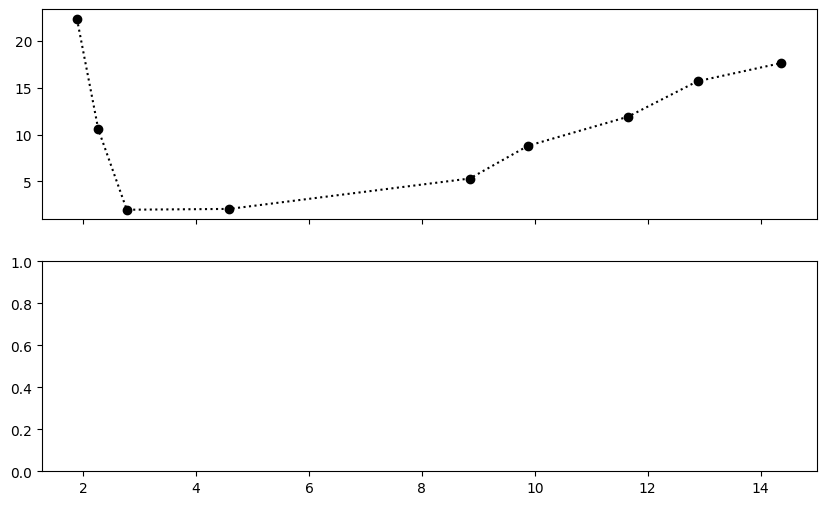

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from labellines import labelLine, labelLines

# Load data from the CSV file
file_path = "/Users/Vincent/Nextcloud/LAM_new_account/FIREBALL/LAM-Transfer/Thermal/FlightPrincipalCatalog_Final_V4_11122018.csv"
data = Table.read(file_path, format="csv")

# Extract columns9
water_temp_bot = data['Water-Temp-bot[C]']
water_temp_top = data['Water-Temp-top[C]TBC']
reject_temp = data['Reject[C]']
dewar_cover = data['Water-Temp-bot-pt100[C]']
emccd_back = data['EMCCDBack[C]']

time_points = [-1.8, 0, 2, 3, 4]  # in hours
labels = ["Ice filling ", "Launch ", r"0<T$_{evap}$"+"<22°C \n No boiling ", "Ice ends \n➛ boiling~2°C\nat 3 mB ", "Start descend \nTboil rises "]


# Exemple d'utilisation
altitude = data['BRD_GPS_126_TM_OPER_ALTITUDE']  # Altitude en mètres
# temperature_eau_bouillante = temperature_ebullition(altitude)
# Create subplots

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))

# First subplot
ax1.plot([1.8907563025210083, 2.2689075630252105, 2.7731092436974794, 4.5882352941176485, 8.84873949579832,   9.882352941176473,  11.647058823529415, 12.882352941176473, 14.369747899159668],
[22.320887636491722,  10.548105469732803,  1.9927791475871786,  2.079831932773107,  5.317264630403063,   8.805791777788961,  11.88610174608766,  15.677049262818901,  17.615483319076137],"o:k", label='~Boiling temperature')

ax1.plot(time, reject_temp, label='Reject', color='red')
ax1.plot(time, dewar_cover, label='Bottom dewar\n', color='purple')

ax1.plot(time, water_temp_bot, label='\nWater dewar', color='blue')
ax1.plot(time, water_temp_top, label='Dewar cover', color='green')
# ax1.plot(time, boiling_temp, label='Boiling Temp (based on Altitude)' , color='orange' , linestyle='--')
ax1.set_ylim((0,25))
ax1.set_ylabel("Temperature [C]")
# ax1.legend(loc="upper right")
labelLines(ax1.get_lines(), align=False, xvals=[6,-1,-1,-1,-1])#, zorder=2.5)

# ax1.grid()

# Second subplot
ax2.plot(time, emccd_back, label='EMCCDBack[C]', color='orange')
ax2.set_xlabel("Time after launch [h]")
ax2.set_xlim((-2.2,10))
ax2.set_ylabel("EMCCDBack Temperature [C]")
ax2.legend(loc="upper right")
# ax2.grid()
ax2.set_ylim((-120,-110))

for t, label in zip(time_points, labels):
    ax1.axvline(x=t, color='gray', linestyle='--', linewidth=1)  # Vertical line
    ax2.axvline(x=t, color='gray', linestyle='--', linewidth=1)  # Vertical line
    ax2.text(t, ax2.get_ylim()[1], label, rotation=90, verticalalignment='top',
             horizontalalignment='right', fontsize=10)#, color='blue', fontweight='bold')

plt.tight_layout()
# Show plot
plt.tight_layout()
plt.show()






In [12]:
altitude.max()

np.float64(39101.796875)

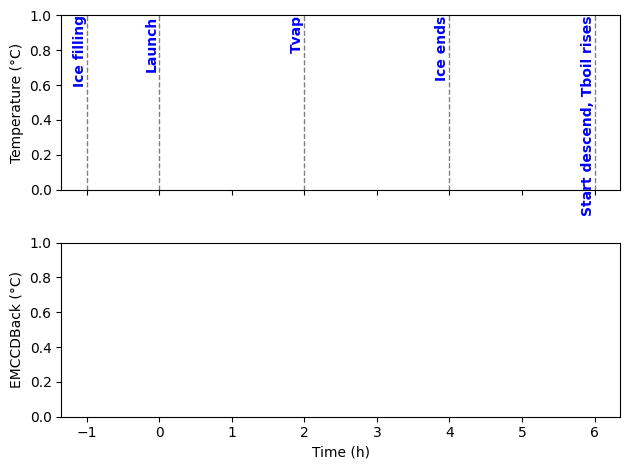

In [54]:
import matplotlib.pyplot as plt

# Sample x-values in hours, adjust this to match your time axis if necessary
time_points = [-1, 0, 2, 4, 6]  # in hours
labels = ["Ice filling", "Launch", "Tvap", "Ice ends", "Start descend, Tboil rises"]

# Assuming you have a figure and ax already created:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

# Plotting example data (replace with your actual data)
# ax1.plot(x, y1)  # First plot
# ax2.plot(x, y2)  # Second plot

# Adding vertical text annotations
for time, label in zip(time_points, labels):
    ax1.axvline(x=time, color='gray', linestyle='--', linewidth=1)  # Vertical line
    ax1.text(time, ax1.get_ylim()[1], label, rotation=90, verticalalignment='top',
             horizontalalignment='right', fontsize=10, color='blue', fontweight='bold')

# Add any additional plot settings as needed
ax1.set_ylabel("Temperature (°C)")  # Customize your y-label
ax2.set_ylabel("EMCCDBack (°C)")    # Customize y-label for the second plot
ax2.set_xlabel("Time (h)")

plt.tight_layout()
plt.show()

In [222]:
import pandas as pd
a = pd.read_excel("/Users/Vincent/Github/fireball2-etc/instruments.xlsx")

In [227]:
a["SCWI"][5]+2

5

In [5]:
import math

# Function to calculate the length of the opposite side using tangent approximation for small angles
def calculate_opposite(adjacent_arcmin, angle_arcmin):
    # Convert angle from arcminutes to radians
    angle_rad = math.radians(angle_arcmin / 60)
    # Calculate the opposite side length
    opposite_arcmin = math.tan(angle_rad) * adjacent_arcmin
    return opposite_arcmin

# Constants
adjacent_arcmin = 9  # adjacent side is 1 arcminute
angles_arcmin = [1, 2, 4, 8,16,32,64,100]  # angles in arcminutes

# Calculate opposite sides for each angle
opposite_sides = {angle: 60*calculate_opposite(adjacent_arcmin, angle) for angle in angles_arcmin}
opposite_sides

{1: 0.15707963710997058,
 2: 0.31415930080283033,
 4: 0.6283188142688819,
 8: 1.2566393298469896,
 16: 2.513292270278345,
 32: 5.026693428769676,
 64: 10.054258076476875,
 100: 15.712395248798595}